# 2D convolutions


In [152]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from scipy import signal
from scipy import linalg
import time

Consider a 2D signal $\mathbf{v}$ representing a picture


(372, 497)


(-0.5, 496.5, 371.5, -0.5)

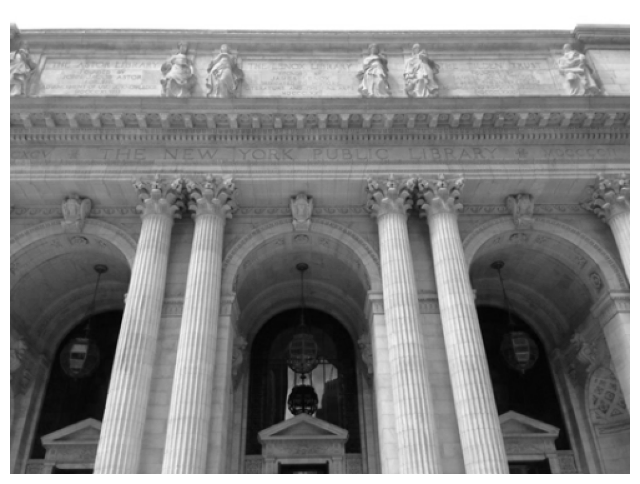

In [153]:
# write here the import path of the image
image_path = "NYlibrary.png"

v = np.mean(imread(image_path), axis=2)
print(v.shape)

plt.rcParams["figure.figsize"] = [8, 8]

vmin = v.min()
vmax = v.max()
img = plt.imshow(v, cmap="gray", vmin=vmin, vmax=vmax)
plt.axis("off")

Consider the following kernels


In [440]:
kernel_blur1 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
kernel_blur1 = kernel_blur1 / np.sum(kernel_blur1)

kernel_blur2 = np.ones((10, 10)) / 100

kernel_edge1 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
kernel_edge2 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
kernel_edge3 = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])

kernel_sobel_horizontal = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
kernel_sobel_vertical = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

kernel_drunk = np.random.randn(50, 50)

Choose here the desired filter $\mathbf{k}$


In [451]:
k = kernel_blur1
k

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

In what follows, we will compute the convolution between $\mathbf{v}$ and $\mathbf{k}$ in 3 different manners. At the end of each point, plot the obtained filtered (i.e. convolved) signal.


## 1. Direct definition (sums of products)

Convolution without "boundary layers"


In [442]:
# ti = time.time()
out_h = v.shape[0] - k.shape[0] + 1
out_w = v.shape[1] - k.shape[1] + 1

# conv_direct = np.zeros((out_h, out_w))
# for i in range(out_h):
#     for j in range(out_w):
#         for g in range(k.shape[0]):
#             for h in range(k.shape[1]):
#                 conv_direct[i, j] += v[i + g, j + h] * k[-g - 1, -h - 1]

# tf = time.time()
# print("Elapsed time: %1.2f s" % (tf - ti))

In [443]:
ti = time.time()
conv_direct2 = np.zeros((out_h, out_w))
for i in range(out_h):
    for j in range(out_w):
        conv_direct2[i, j] = np.sum(
            np.flip(k) * v[i : i + k.shape[0], j : j + k.shape[1]]
        )

tf = time.time()
print("Elapsed time: %1.2e s" % (tf - ti))

Elapsed time: 1.88e+00 s


(-0.5, 447.5, 322.5, -0.5)

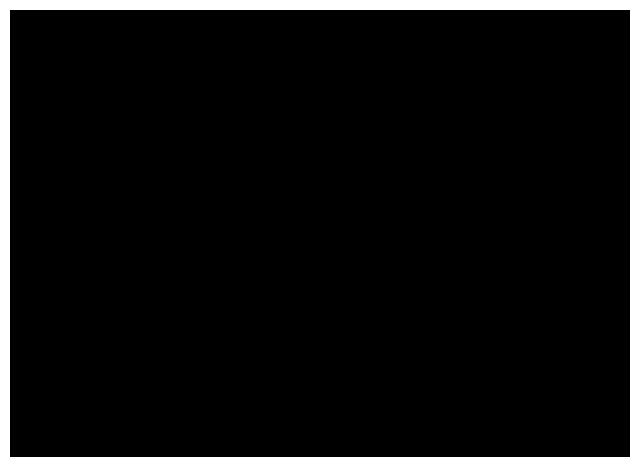

In [444]:
plt.rcParams["figure.figsize"] = [8, 8]

vmin = v.min()
vmax = v.max()
img = plt.imshow(conv_direct2, cmap="gray", vmin=vmin, vmax=vmax)
plt.axis("off")

## 2. Convolution through DFT

Besides the filtered image, plot the DFT of the original image, of the kernel and of the filtered image.


In [445]:
from numpy.fft import fft2, fftfreq, fftshift, ifft2

ti = time.time()

v_fft = fft2(v)
k_fft = fft2(k, v.shape)

vk_fft = v_fft * k_fft

conv_fft = np.real(ifft2(vk_fft))
tf = time.time()

tf = time.time()
print("Elapsed time: %1.2e s" % (tf - ti))

Elapsed time: 3.05e-02 s


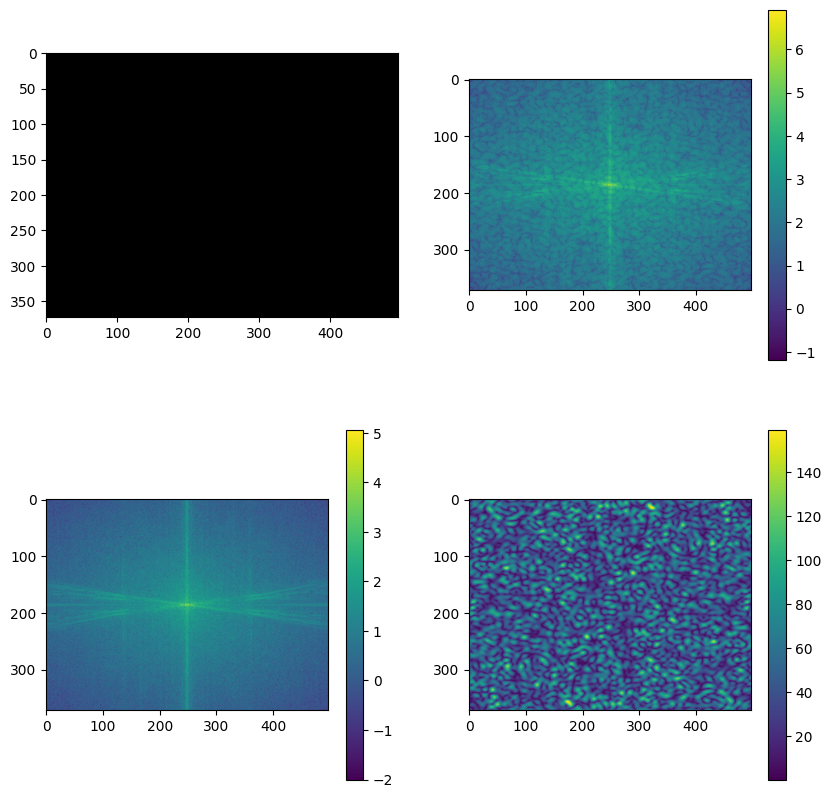

In [446]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
img = axs[0].imshow(conv_fft, cmap="gray", vmin=vmin, vmax=vmax)
img = axs[1].imshow(fftshift(np.log10(np.absolute(vk_fft))))
fig.colorbar(img, ax=axs[1])
img = axs[2].imshow(fftshift(np.log10(np.absolute(v_fft))))
fig.colorbar(img, ax=axs[2])
img = axs[3].imshow(fftshift((np.absolute(k_fft))))
fig.colorbar(img, ax=axs[3])

## 3. Using the command `scipy.signal.convolve`

Check out the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html).


In [447]:
ti = time.time()

conv = signal.convolve(v, k, mode="same")

tf = time.time()
print("Elapsed time: %1.2e s" % (tf - ti))

Elapsed time: 9.62e-03 s


(-0.5, 496.5, 371.5, -0.5)

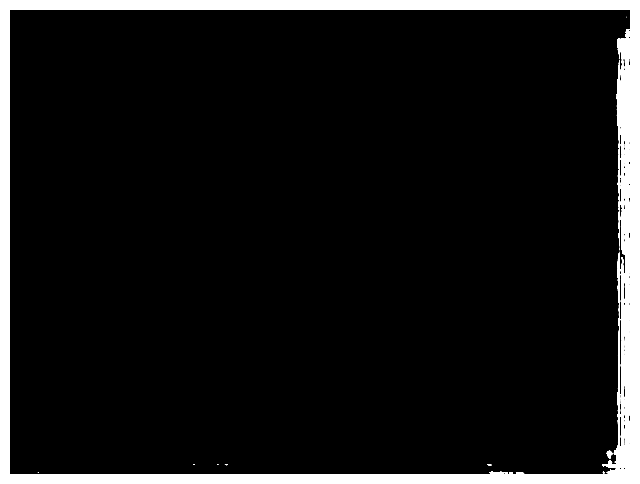

In [448]:
plt.rcParams["figure.figsize"] = [8, 8]

vmin = v.min()
vmax = v.max()
img = plt.imshow(conv, cmap="gray", vmin=vmin, vmax=vmax)
plt.axis("off")

In [449]:
def apply_filter(img, filter):
    return signal.convolve(img, filter, mode="same")

(-0.5, 496.5, 371.5, -0.5)

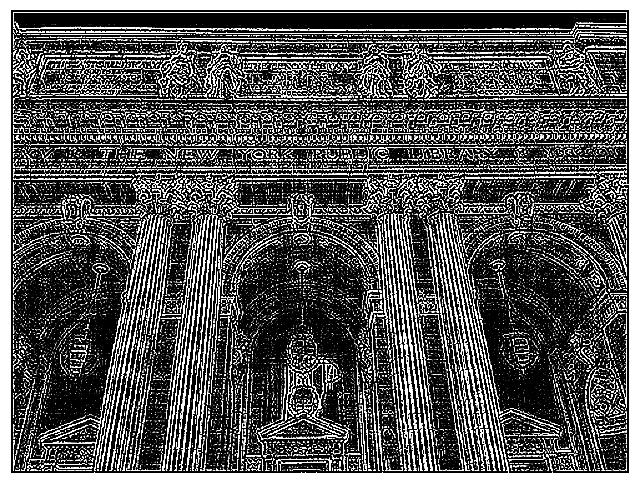

In [450]:
sharpened = apply_filter(v, kernel_sharpen)
edged = apply_filter(sharpened, kernel_edge1)
sharpened2 = apply_filter(edged, kernel_sharpen)
plt.rcParams["figure.figsize"] = [8, 8]

vmin = v.min()
vmax = v.max()
img = plt.imshow(sharpened2, cmap="gray", vmin=vmin, vmax=vmax)
plt.axis("off")